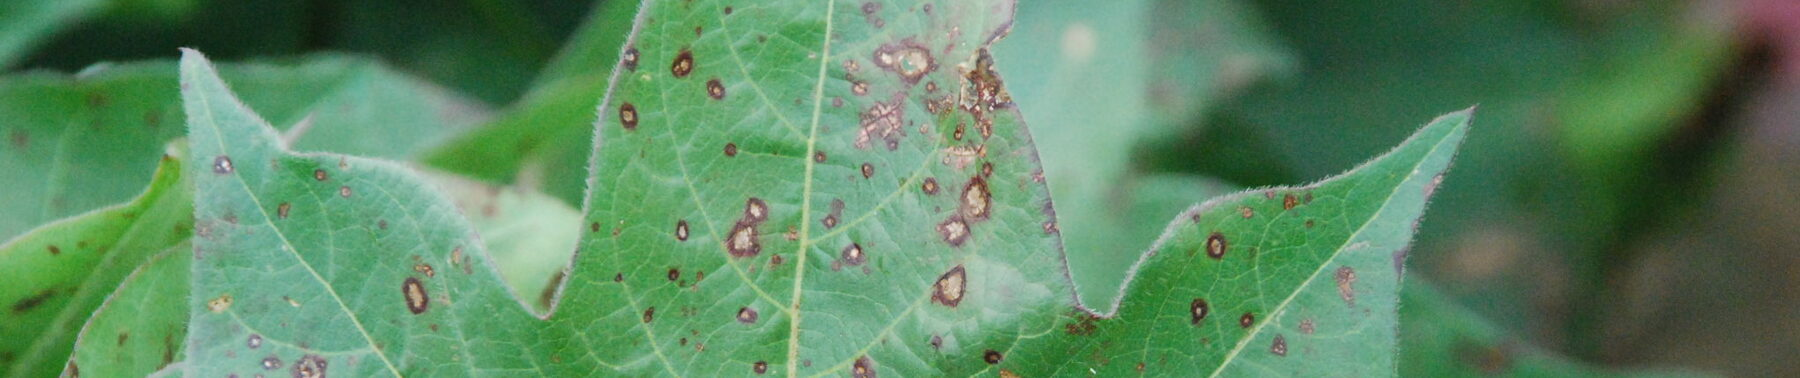

# About the data

This dataset is recreated using offline augmentation from the original dataset. The original dataset can be found on this github repo. This dataset consists of about 87K rgb images of healthy and diseased crop leaves which is categorized into 38 different classes. The total dataset is divided into 80/20 ratio of training and validation set preserving the directory structure. A new directory containing 33 test images is created later for prediction purpose.

# Importing Libraries

In [7]:
!pip install tensorflow

  Using cached tensorflow-2.11.0-cp310-cp310-win_amd64.whl (1.9 kB)
     -------------------------------------- 266.3/266.3 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 895.7/895.7 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 1.8

In [5]:
import os                       # for working with files
import os.path
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import seaborn as sns
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
from PIL import Image           # for checking images
import Augmentor
import cv2
%matplotlib inline

# Train Data Loading and Exploring

In [37]:
data_dir_kaggel = "Data\\kaggel_dataset\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)"
data_dir_dell = "Data\\dell_dataset\\original"
data_dir_dell_resized = "Data\\dell_dataset\\resized"
data_dir_dell_ogma = "University/4th year/1st Semester/Graduation Project/Data/dell_dataset/augment"
data_dir_dell_omg_for_use= "Data\\dell_dataset\\augment"
train_dir = data_dir_kaggel + "\\train"
valid_dir = data_dir_kaggel + "\\valid"
dataset_kaggel = os.listdir(train_dir)
dataset_dell = os.listdir(data_dir_dell)

In [33]:
for filename in os.listdir(data_dir_dell):
    tmp = filename.split('__')
    my_dest =tmp[0] + '___'+tmp[1]
    my_source =data_dir_dell +'\\'+ filename
    my_dest =data_dir_dell +'\\'+ my_dest
    # rename() function will
    # rename all the files
    os.rename(my_source, my_dest)

In [38]:
dataset_kaggel

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [12]:
a = os.listdir(valid_dir)
a

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [39]:
dataset_dell

['Alstonia Scholaris___diseased',
 'Alstonia Scholaris___healthy',
 'Arjun___diseased',
 'Arjun___healthy',
 'Bael___diseased',
 'Basil___healthy',
 'Chinar ___diseased',
 'Chinar ___healthy',
 'Gauva___diseased',
 'Gauva___healthy',
 'Jamun___diseased',
 'Jamun___healthy',
 'Jatropha___diseased',
 'Jatropha___healthy',
 'Lemon___diseased',
 'Lemon___healthy',
 'Mango ___healthy',
 'Mango___diseased',
 'Pomegranate___diseased',
 'Pomegranate___healthy',
 'PongamiaPinnata___diseased',
 'PongamiaPinnata___healthy']

In [40]:
# show number of total classes 
print(f'Number of Classes in Kaggel dataset (plante valy ) : {len(dataset_kaggel)}')
print(f'Number of Classes in DELL dataset  : {len(dataset_dell)}')
print (f'The Total number of classes is : {len(dataset_dell ) + len(dataset_kaggel)}')

Number of Classes in Kaggel dataset (plante valy ) : 38
Number of Classes in DELL dataset  : 22
The Total number of classes is : 60


In [41]:
# Number of images for each disease
nums_train = {}
nums_val = {}
for disease in dataset_kaggel:
    nums_train[disease] = len(os.listdir(train_dir + '\\' + disease))
    if(os.path.exists(valid_dir + '\\' + disease)):
        nums_val[disease] = len(os.listdir(valid_dir + '\\' + disease))
# tmp_dir = 'Data\\the provided dataset_Augment'
for plant in dataset_dell:
    nums_train[plant]= len(os.listdir(data_dir_dell + '\\' + plant))
img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
print('Train data distribution :')
img_per_class_train

Train data distribution :


,no. of images
Apple___Apple_scab,2016
Apple___Black_rot,1987
Apple___Cedar_apple_rust,1760
Apple___healthy,2008
Blueberry___healthy,1816
Cherry_(including_sour)___healthy,1826
Cherry_(including_sour)___Powdery_mildew,1683
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,1642
Corn_(maize)___Common_rust_,1907
Corn_(maize)___healthy,1859


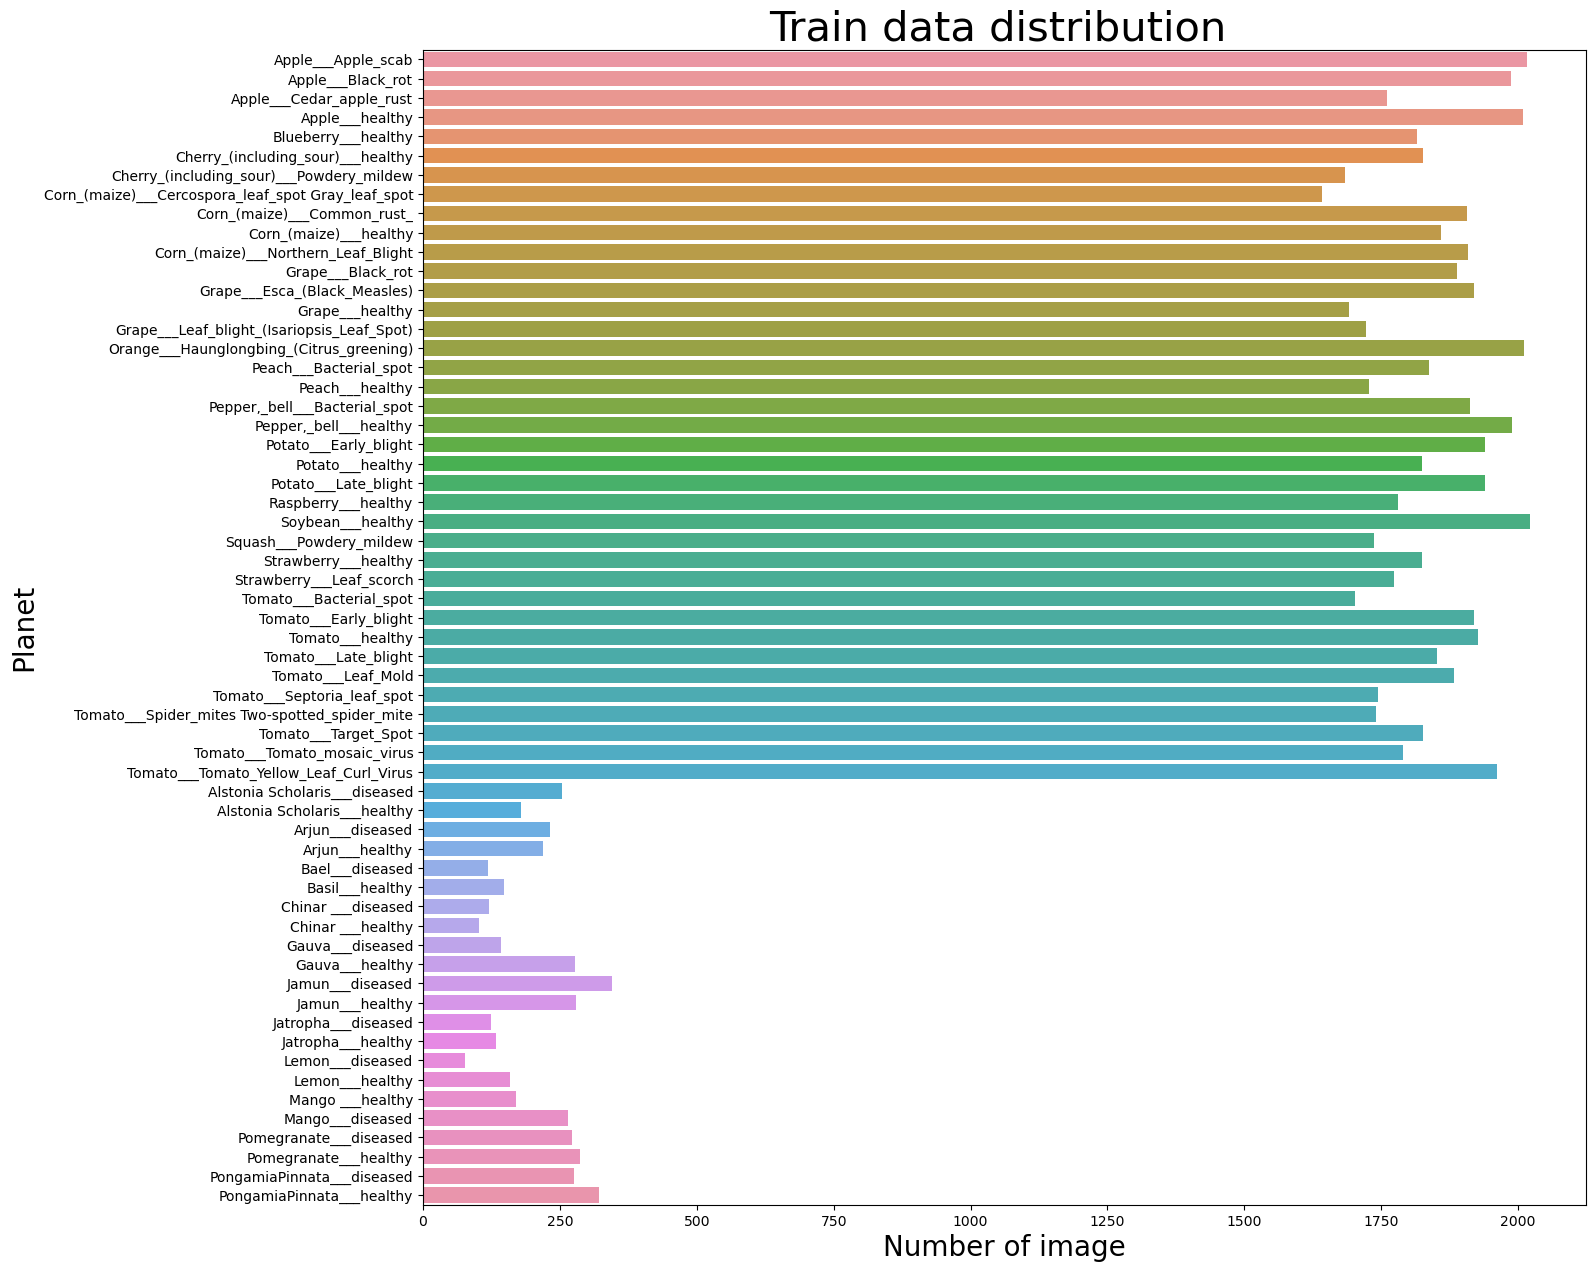

In [42]:
def show_data_distribution(nums_train):
    plt.figure(figsize=(15,15))
    plt.title('Train data distribution ',fontsize=30)
    plt.xlabel('Number of image',fontsize=20)
    plt.ylabel('Planet',fontsize=20)

    keys = list(nums_train.keys())
    # get values in the same order as keys, and parse percentage values
    vals = list(nums_train.values())
    sns.barplot(y=keys, x=vals)
    plt.savefig('save_as_a_png.png')
    
show_data_distribution(nums_train)

## Here we found a problem 
***Data is not distreputed well***
we will try to ougmant the data and split thim to validation folder


In [43]:
# for pla in dataset_dell:
for file in dataset_dell:
    if not os.path.exists(data_dir_dell_resized):
        os.mkdir(data_dir_dell_resized)
    
    if (not os.path.exists(data_dir_dell_resized+'\\'+file)) :
        print(f'resizing {file} class imagees')
        os.mkdir(data_dir_dell_resized+'\\'+file)
        images = os.listdir(data_dir_dell+'\\'+file)
        img_num = 1
        for img in images:
            org_img = cv2.imread(data_dir_dell+'\\'+file+'\\'+img)
            resize_img = cv2.resize(org_img,(256,256))
            cv2.imwrite(data_dir_dell_resized+'\\'+file+'\\'+file+' '+str(img_num)+'.png',resize_img) 
            img_num+=1

In [44]:
tmp_ogm = "Data\\dell_dataset\\augment"

if not os.path.exists(tmp_ogm):
    for re_file in dataset_dell:
        p = Augmentor.Pipeline(data_dir_dell_resized+'\\'+re_file ,'/'+data_dir_dell_ogma+'/'+re_file+'/')
        p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)
        p.flip_left_right(probability=0.5)
        p.zoom_random(probability=0.5, percentage_area=0.8)
        p.flip_top_bottom(probability=0.5)
        p.sample(1750)

## data after augmataint and blanceing


Train data distribution :


,no. of images
Apple___Apple_scab,2016
Apple___Black_rot,1987
Apple___Cedar_apple_rust,1760
Apple___healthy,2008
Blueberry___healthy,1816
Cherry_(including_sour)___healthy,1826
Cherry_(including_sour)___Powdery_mildew,1683
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,1642
Corn_(maize)___Common_rust_,1907
Corn_(maize)___healthy,1859


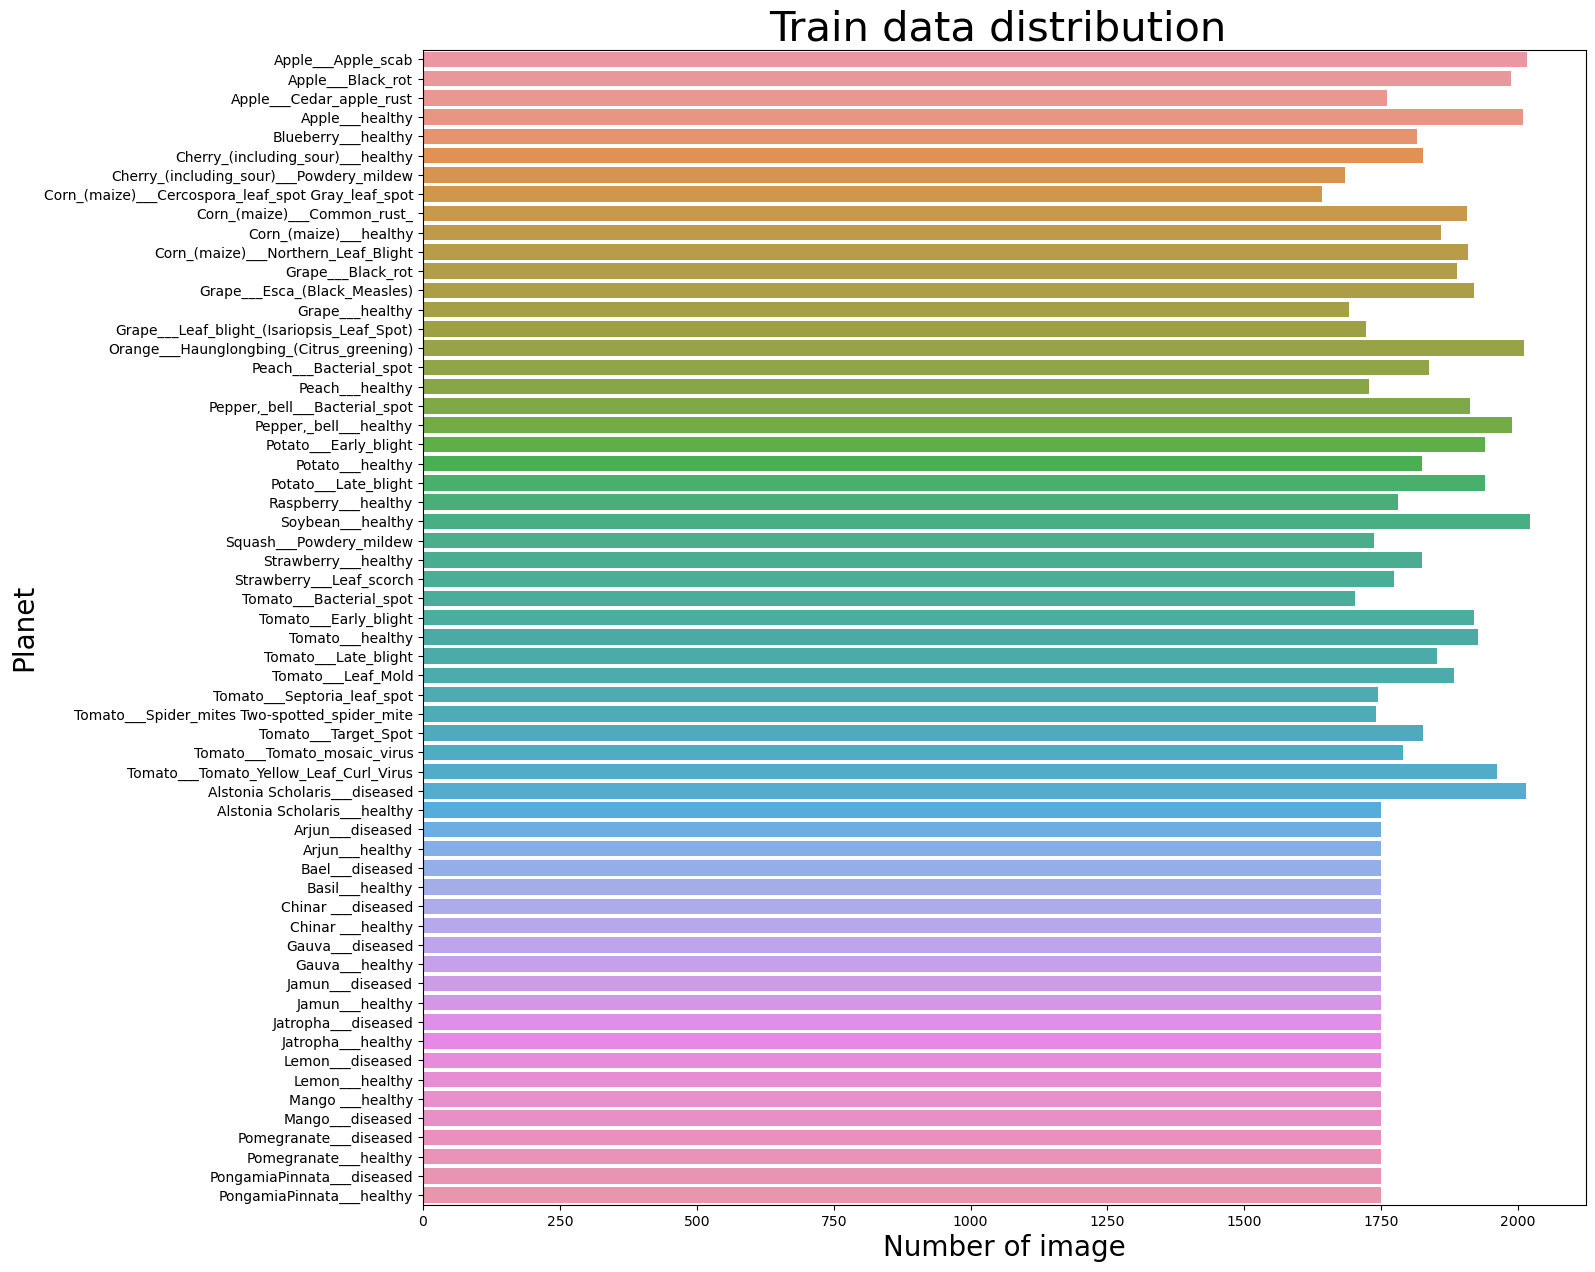

In [45]:
for plant in dataset_dell:
    nums_train[plant]= len(os.listdir(data_dir_dell_omg_for_use + '\\' + plant))
img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
show_data_distribution(nums_train)
print('Train data distribution :')
img_per_class_train

In [47]:
# show number of images in train data
number_train = 0
for value in nums_train.values():
    number_train += value
print("The number of images for training : ",number_train)




The number of images for training :  109060


### coutning the number of plantes in the both data sets

In [48]:
plants=[]
diseases_unique=[]
for i in dataset_kaggel:
  if(i.split('__'))[0] not in plants:
    plants.append(i.split('__')[0])
  if(i.split('___'))[1] != 'healthy':
    diseases_unique.append(i.split('___')[1])
    
for j in dataset_dell:
    tmp = j.split('__')
    if tmp[0] not in plants:
       plants.append(tmp[0])

## show names and number of plants for kaggel data set only
***sence the dell data set has no desess only tell if the planet is healthy or not***

In [49]:
# show names and number of plants
# Names
print('Plantes :',plants)
# Number of platns:
print('-'*100)
print('Number of plants : ',len(plants))

Plantes : ['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato', 'Alstonia Scholaris', 'Arjun', 'Bael', 'Basil', 'Chinar ', 'Gauva', 'Jamun', 'Jatropha', 'Lemon', 'Mango ', 'Mango', 'Pomegranate', 'PongamiaPinnata']
----------------------------------------------------------------------------------------------------
Number of plants :  27


In [50]:
# show names and number of unique diseases
# Names
print('diseases :',diseases_unique)
# Number of unique diseases:
print('-'*100)
print('Number of unique diseases : ',len(diseases_unique))

diseases : ['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'Powdery_mildew', 'Cercospora_leaf_spot Gray_leaf_spot', 'Common_rust_', 'Northern_Leaf_Blight', 'Black_rot', 'Esca_(Black_Measles)', 'Leaf_blight_(Isariopsis_Leaf_Spot)', 'Haunglongbing_(Citrus_greening)', 'Bacterial_spot', 'Bacterial_spot', 'Early_blight', 'Late_blight', 'Powdery_mildew', 'Leaf_scorch', 'Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite', 'Target_Spot', 'Tomato_mosaic_virus', 'Tomato_Yellow_Leaf_Curl_Virus']
----------------------------------------------------------------------------------------------------
Number of unique diseases :  26


### Distribution planets for each disease 

# Validation Data 

Validation data distribution :


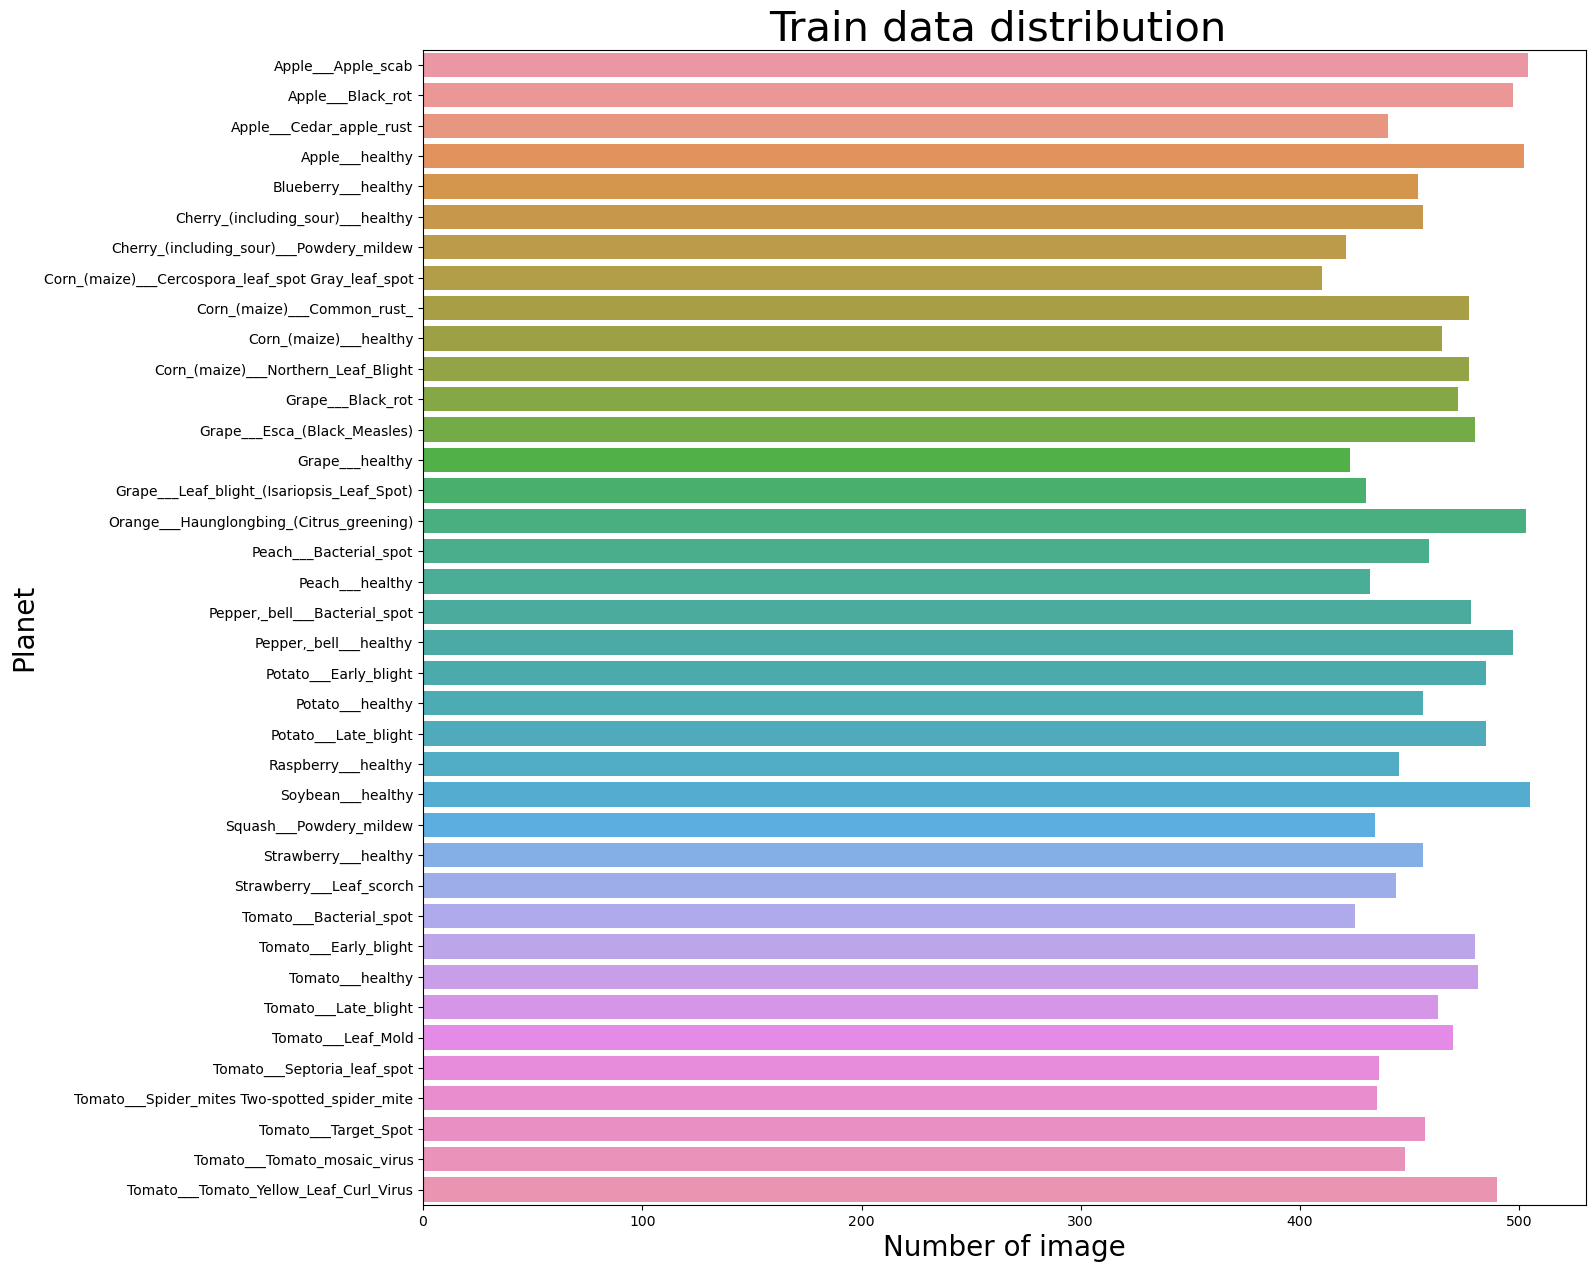

In [53]:
img_per_class_val = pd.DataFrame(nums_val.values(), index=nums_val.keys(), columns=["no. of images"])
print('Validation data distribution :')
img_per_class_val
show_data_distribution(nums_val)

In [59]:
# show number of images in validation data
number_val = 0
for value in nums_val.values():
    number_val += value
print("The number of images for validation : ",number_val)


The number of images for validation :  17572
